# WebScraping with Selenium

This notebook shows how use selenium to scrape data from a company web site to collect web job posting.
The scope is only to understand the capabilities of web scraping and prepare a dataset for academic purporse.

Let’s begin writing our scraper!

We will first install important modules and packages for our Notebook


*   Selenium
*   Chromium-chromedriver



In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

And now we will import some modules on our Notebook


1.   sys: to setup the path of chrome driver
2.   selenium: to emulate the user behaviour
3.   pandas: to work with data
4.   tqdm: to show a progress bar in our notebook
5.   json: to work with json format





In [ ]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from tqdm import tqdm_notebook as tqdm
import pandas
import json
import pprint

First we need to set the options for the ghost browser.
The most important is `--headless` because we are in a "cloud" notebook. In our local notebook we can remove the `--headless` option.  


In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("window-size=1900,800")
chrome_options.add_argument("--enable-javascript")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36")

`webdriver` is the most importa object in Selenium.
With `webdriver` we can start the phantom browser, emulate the user navigation and scrape our data. 

Let’s now create a new instance of google chrome.


We will navitage to page by a `get` request. With http we can do a get or a post (or others but they are not important for us): https://www.w3schools.com/tags/ref_httpmethods.asp 



```
wd.get("https://www.amazon.jobs/en/search?base_query=&loc_query=Germany&latitude=52.51605&longitude=13.37691&loc_group_id=&invalid_location=false&country=DEU&city=&region=&county=")
```



In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.amazon.jobs/en/search?base_query=&loc_query=Germany&latitude=52.51605&longitude=13.37691&loc_group_id=&invalid_location=false&country=DEU&city=&region=&county=")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


Take a look to the screenshot from our phantom browser.

Note:
- la language and the locale: It is en_US!
- the screen ratio: is it the same of our notebook?

Populating the interactive namespace from numpy and matplotlib


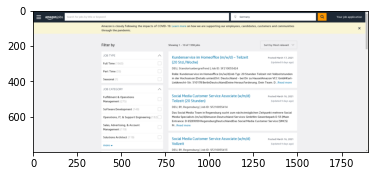

In [ ]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

Let's try to extract some information from the page



`title` contains the title of our page.




In [ ]:
print(wd.title)

Job search | Amazon.jobs


### How do we extract the values inside a page with CSS Selector?

Selenium has a method called `find_elements_by_css_selector`.

We will pass our CSS Selector into this method and get a list of selenium elements. Once we have the element, we can extract the text inside it using the `text` function.

In [ ]:
list_postings = wd.find_elements_by_css_selector(".job-title")
print(len(list_postings))

10


In [ ]:
print(list_postings[0].text)

Kundenservice im Homeoffice (m/w/d) – Teilzeit (20 Std./Woche)


# Extract the job postings list

Let's begin to download the list of companies.

The list of companies is defined by the css selection rule
`.job`



In [ ]:
list_postings = wd.find_elements_by_css_selector(".job-tile")
print(len(list_postings))

10


Gread! We find 10 items!

Now, we will extract the attribute from each single element.
The scope is to create one dict for each item in the list with the attribute:


1. occupation title
2. description
3. url
4. location




In [ ]:
import pprint
import time
items = []
for item in list_postings:
    title = item.find_elements_by_css_selector(".job-title")[0].text
    url = item.find_elements_by_css_selector(".job-link")[0].get_attribute("href")
    location = item.find_elements_by_css_selector(".location-and-id")[0].text
    description = item.find_elements_by_css_selector(".description")[0].text
    job_id = item.find_elements_by_css_selector(".job")[0].get_attribute("data-job-id")

    items.append({'title': title,
                  'url': url,
                  'location': location,
                  'description': description,
                  'job_id': job_id})


pprint.pprint(items[0:5])

[{'description': 'Rolle: Kundenservice im Homeoffice (m/w/d)Job Typ: 20 '
                 'Stunden Teilzeit mit Vollzeitstunden in der Hochsaison '
                 '(Details unten)Ort: Deutschland - bei Dir zu Hause!Amazon '
                 'VCC GmbHKarl-Liebknecht-Str. 510178 BerlinDeutschlandDeine '
                 'Herausforderung. Dein Team. D...Read more',
  'job_id': 'SF210055424',
  'location': 'DEU, Standortuebergreifend | Job ID: SF210055424',
  'title': 'Kundenservice im Homeoffice (m/w/d) – Teilzeit (20 Std./Woche)',
  'url': 'https://www.amazon.jobs/en/jobs/SF210055424/kundenservice-im-homeoffice-m-w-d-teilzeit-20-std-woche'},
 {'description': 'Das Social Media Team in Regensburg sucht zum '
                 'nächstmöglichen Zeitpunkt mehrere Social Media Specialists '
                 '(m/w/d)Amazon Deutschland Services GmbHIm Gewerbepark D 55 '
                 '(Main Entrance: D 65)93059 RegensburgDeutschlandDas Social '
                 'Media Customer Service (SMCS

In [ ]:
len(items)

10

In [ ]:
import pprint
import time
items = []
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

for page in range(0, 10):
  offset = 10 * page
  wd.get(f"https://www.amazon.jobs/en/search?offset={offset}&result_limit=10&sort=relevant&distanceType=Mi&radius=24km&latitude=52.51605&longitude=13.37691&loc_group_id=&loc_query=Germany&base_query=&city=&country=DEU&region=&county=&query_options=&")
  time.sleep(2)
  list_postings = wd.find_elements_by_css_selector(".job-tile")
  for item in list_postings:
    title = item.find_elements_by_css_selector(".job-title")[0].text
    url = item.find_elements_by_css_selector(".job-link")[0].get_attribute("href")
    location = item.find_elements_by_css_selector(".location-and-id")[0].text
    description = item.find_elements_by_css_selector(".description")[0].text
    job_id = item.find_elements_by_css_selector(".job")[0].get_attribute("data-job-id")

    items.append({'title': title,
                  'url': url,
                  'location': location,
                  'description': description,
                  'job_id': job_id})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
len(items)

100

In [ ]:
items_details = []
for item in items:
  print(item['url'])
  wd.get(item['url'])
  time.sleep(2)
  wd.save_screenshot('screenshot.png')
  description = wd.find_elements_by_css_selector(".section")[0].text
  items_details.append({'title': item['title'],
                        'url': item['url'],
                        'location': ['location'],
                        'description': description,
                        'job_id': item['job_id']})

In [ ]:
len(items_details)

100

# Pandas and data processing

**Well!**
We're starting to see another amazing library for working with data!

It's **pandas**: *Python library for data analysis*.

Basically, with pandas we can manipulate a data set or a historical series in Python.

For now, we start to give a couple of concepts.

Pandas is based on two types of data: **Series** and **DataFrame**:
- `Series` represents a list of data
- `DataFrame` represent a data set in tabular format

Each column of a `DataFrame` is a `Series`.

We can create a `DataFrame` using the `pd.DataFrame` method by passing our dictionary as an input parameter.

A `DataFrame` pandas can be easily exported in *CSV*, *Excel*, ...

For more information about `Pandas` see

https://pandas.pydata.org/getting_started.html


In [ ]:
import pandas as pd
ds_items = pd.DataFrame(items_details)
ds_items.set_index("job_id")
ds_items.head()

,title,url,location,description,job_id
0,Kundenservice im Homeoffice (m/w/d) – Teilzeit...,https://www.amazon.jobs/en/jobs/SF210055424/ku...,[location],DESCRIPTION\nRolle: Kundenservice im Homeoffic...,SF210055424
1,Social Media Customer Service Associate (w/m/d...,https://www.amazon.jobs/en/jobs/SF210055414/so...,[location],DESCRIPTION\nDas Social Media Team in Regensbu...,SF210055414
2,Social Media Customer Service Associate (w/m/d...,https://www.amazon.jobs/en/jobs/SF210055413/so...,[location],DESCRIPTION\nDas Social Media Team in Regensbu...,SF210055413
3,Kundenservice im Homeoffice (m/w/d) – Vollzeit...,https://www.amazon.jobs/en/jobs/SF210055410/ku...,[location],DESCRIPTION\nKundenservicemitarbeiter*innen im...,SF210055410
4,Kundenservice (m/w/d) – Berlin – deutsprachige...,https://www.amazon.jobs/en/jobs/SF210054326/ku...,[location],DESCRIPTION\nKundenservicemitarbeiter*innen / ...,SF210054326


In [ ]:
ds_items.to_csv('ds_items.csv')